# Tarea 1 - Taller de Deep Learning

**Fecha de entrega: 19/10/2025**  

In [83]:
import torchvision.datasets as datasets
from pathlib import Path
from collections import Counter
import torch
from torchvision.transforms import v2 as T
from torch.utils.data import DataLoader, random_split

In [6]:
DATA_DIR = Path("data")

imagenette_dataset = datasets.Imagenette(
    DATA_DIR, download=True
)


100.0%


Extracting data\imagenette2.tgz to data


In [10]:
name_classes = imagenette_dataset.classes
nclasses = len(name_classes)

print(f"Clases: {name_classes}")

Clases: [('tench', 'Tinca tinca'), ('English springer', 'English springer spaniel'), ('cassette player',), ('chain saw', 'chainsaw'), ('church', 'church building'), ('French horn', 'horn'), ('garbage truck', 'dustcart'), ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'), ('golf ball',), ('parachute', 'chute')]


In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de imágenes por clase
labels = [imagenette_dataset.classes[target] for _, target in imagenette_dataset]
conteo = Counter(labels)


In [41]:
print(f'Cantidad de imágenes en el dataset: {len(labels)}')

Cantidad de imágenes en el dataset: 9469


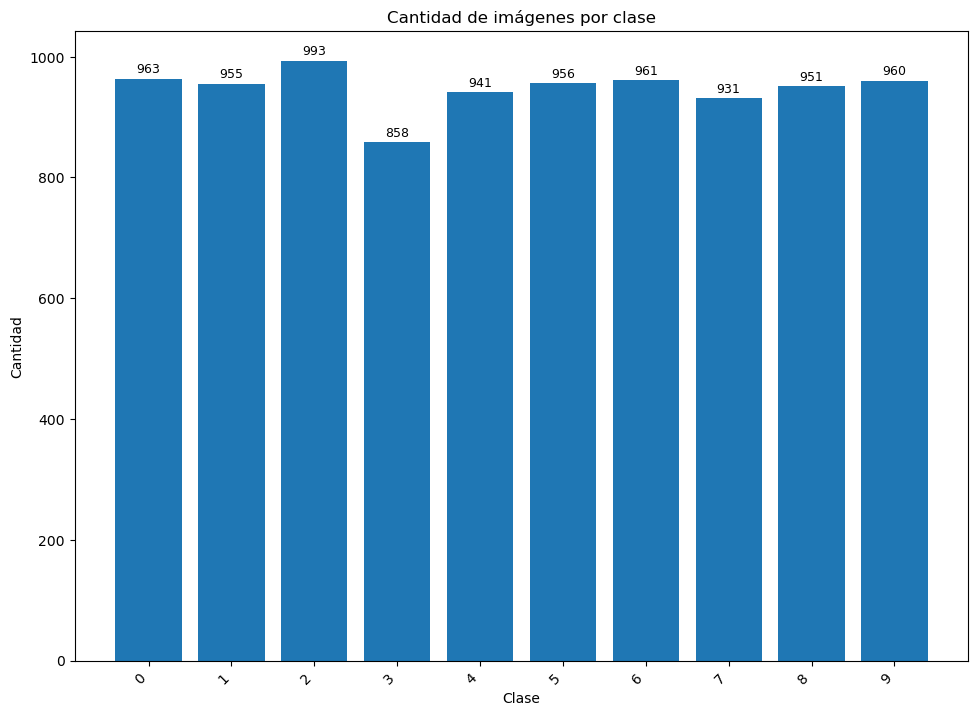

In [39]:
plt.figure(figsize=(10, 10))
plt.bar([", ".join(cls) for cls in conteo.keys()], conteo.values())
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad de imágenes por clase")
plt.ylabel("Cantidad")
plt.xlabel("Clase")
plt.tight_layout()
for i, (k, v) in enumerate(zip(conteo.keys(), conteo.values())):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=9)
plt.xticks(ticks=range(len(conteo)), labels=range(len(conteo)), rotation=45, ha='right')
plt.show()

Si bien observamos que el dataset no contiene la misma cantidad exacta de imágenes por clase podríamos decir que el mismo esta balanceado.
La clase con más datos contiene el 10.5% del total mientras que la que tiene menos datos representa el 9.1%

In [48]:
sizes = [imagenette_dataset[i][0].size for i in range(len(imagenette_dataset))]
conteo_sizes = Counter(sizes)

In [53]:
sizes = [imagenette_dataset[i][0] for i in range(len(imagenette_dataset)) if imagenette_dataset[i][0].size == (149, 149)]

In [72]:
print(f"Cantidad de tamaños únicos: {len(conteo_sizes.keys())}")

Cantidad de tamaños únicos: 1


In [52]:
conteo_sizes.most_common()

[((500, 375), 2174),
 ((500, 333), 818),
 ((375, 500), 717),
 ((333, 500), 309),
 ((500, 334), 207),
 ((640, 480), 126),
 ((500, 332), 91),
 ((500, 500), 88),
 ((400, 300), 78),
 ((500, 335), 75),
 ((334, 500), 67),
 ((500, 400), 53),
 ((500, 374), 46),
 ((332, 500), 45),
 ((200, 150), 44),
 ((500, 376), 42),
 ((335, 500), 38),
 ((600, 450), 36),
 ((500, 357), 34),
 ((500, 377), 33),
 ((240, 180), 31),
 ((1600, 1200), 31),
 ((400, 500), 30),
 ((250, 250), 27),
 ((1024, 768), 27),
 ((800, 600), 26),
 ((90, 90), 26),
 ((320, 240), 25),
 ((376, 500), 23),
 ((100, 100), 23),
 ((500, 281), 22),
 ((500, 338), 20),
 ((357, 500), 20),
 ((280, 280), 20),
 ((500, 337), 19),
 ((400, 400), 19),
 ((480, 360), 18),
 ((300, 225), 17),
 ((500, 331), 17),
 ((300, 300), 17),
 ((500, 340), 16),
 ((500, 341), 16),
 ((160, 160), 16),
 ((200, 200), 16),
 ((773, 1162), 16),
 ((1162, 773), 16),
 ((500, 348), 15),
 ((338, 500), 15),
 ((377, 500), 15),
 ((500, 350), 14),
 ((500, 381), 14),
 ((500, 395), 14),
 (

Aplicamos los transforms ToImage() para pasar las imágenes a tensores y Resize() para que todas las imágenes tengan el mismo tamaño (224,224)

In [78]:
transforms = T.Compose([
    T.ToImage(),
    T.Resize((224, 224))

])

imagenette_dataset_transformado = datasets.Imagenette(
    DATA_DIR, download=False, transform=transforms
)


In [68]:
sizes = [imagenette_dataset_transformado[i][0].size() for i in range(len(imagenette_dataset_transformado))]

In [71]:
conteo_sizes_2 = Counter(sizes)
conteo_sizes_2

Counter({torch.Size([3, 224, 224]): 9469})

Luego de aplicadas las transformaciones observamos que solamente tenemos tensores de 1 forma [3, 224, 224]. El 3 corresponde a la cantidad de canales por ser imágenes RGB. 
Aplicaremos la tranformacion Grayscale para pasar las imagenes a escala de grises

In [93]:
transforms = T.Compose([
    T.ToImage(),
    T.Grayscale(),
    T.ToDtype(torch.float32, scale=True),
    T.Resize((224, 224))

])

imagenette_dataset_train = datasets.Imagenette(
    DATA_DIR, download=False,split = 'train', transform=transforms
)

imagenette_dataset_val = datasets.Imagenette(
    DATA_DIR, download=False,split = 'val', transform=transforms
)

In [94]:
sizes_final = [imagenette_dataset_train[i][0].size() for i in range(len(imagenette_dataset_train))]   


KeyboardInterrupt: 

In [76]:
conteo_sizes_final = Counter(sizes_final)
conteo_sizes_final

Counter({torch.Size([1, 224, 224]): 9469})

In [95]:
imagenette_dataset_train, imagenette_dataset_test = random_split(
    imagenette_dataset_train, [0.8, 0.2]
)

Entrenamiento

In [96]:
import sys

# definimos el dispositivo que vamos a usar
DEVICE = "cpu"  # por defecto, usamos la CPU
if torch.cuda.is_available():
    DEVICE = "cuda"  # si hay GPU, usamos la GPU
elif torch.backends.mps.is_available():
    DEVICE = "mps"  # si no hay GPU, pero hay MPS, usamos MPS
elif torch.xpu.is_available():
    DEVICE = "xpu"  # si no hay GPU, pero hay XPU, usamos XPU

print(f"Usando {DEVICE}")

NUM_WORKERS = 0 # Win y MacOS pueden tener problemas con múltiples workers
if sys.platform == 'linux':
    NUM_WORKERS = 4  # numero de workers para cargar los datos (depende de cada caso)

print(f"Usando {NUM_WORKERS}")

Usando cpu
Usando 0


In [87]:
BATCH_SIZE = 128  # tamaño del batch

In [97]:
def get_dataloaders(batch_size=BATCH_SIZE, num_workers=NUM_WORKERS):
    train_loader = DataLoader(
        imagenette_dataset_train,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
    )

    val_loader = DataLoader(
        imagenette_dataset_val,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
    )

    test_loader = DataLoader(
        imagenette_dataset_test,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
    )

    return train_loader, val_loader, test_loader


train_loader, val_loader, test_loader = get_dataloaders()

### Red convolucional simple y loop de entrenamiento (prueba rápida)

In [98]:
# SimpleCNN: pequeña red convolucional para probar el pipeline
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

class SimpleCNN(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((7,7)),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(64*7*7, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, n_classes),
        )
    def forward(self, x):
        x = self.conv(x)
        x = self.classifier(x)
        return x

# Instanciar el modelo
model = SimpleCNN(nclasses).to(DEVICE)
print(model)

# Funciones de entrenamiento/validación rápidas (para prueba)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def run_epoch(loader, train=True):
    if train:
        model.train()
    else:
        model.eval()
    losses = 0.0
    preds_all = []
    targets_all = []
    with torch.set_grad_enabled(train):
        for xb, yb in loader:
            # ensure input is float (some transforms may produce uint8 tensors)
            xb = xb.to(DEVICE).float()
            yb = yb.to(DEVICE)
            outputs = model(xb)
            loss = criterion(outputs, yb)
            if train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            losses += loss.item() * xb.size(0)
            preds = outputs.argmax(dim=1).detach().cpu().numpy()
            preds_all.extend(preds.tolist())
            targets_all.extend(yb.detach().cpu().numpy().tolist())
    avg_loss = losses / len(loader.dataset)
    acc = accuracy_score(targets_all, preds_all)
    prec, rec, f1, _ = precision_recall_fscore_support(targets_all, preds_all, average='weighted', zero_division=0)
    return avg_loss, acc, prec, rec, f1

# Entrenamiento corto de prueba (3 epochs por defecto)
EPOCHS = 3
best_val_loss = float('inf')
for epoch in range(1, EPOCHS+1):
    tr_loss, tr_acc, tr_prec, tr_rec, tr_f1 = run_epoch(train_loader, train=True)
    val_loss, val_acc, val_prec, val_rec, val_f1 = run_epoch(val_loader, train=False)
    print(f'Epoch {epoch}/{EPOCHS} - train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {val_loss:.4f} acc {val_acc:.4f} f1 {val_f1:.4f}')
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pt')
        print('  Mejor modelo guardado')

# Fin de prueba: cargar y evaluar en test si hay modelo guardado
if Path('best_model.pt').exists():
    model.load_state_dict(torch.load('best_model.pt', map_location=DEVICE))
    test_loss, test_acc, test_prec, test_rec, test_f1 = run_epoch(test_loader, train=False)
    print(f'Test - loss {test_loss:.4f} acc {test_acc:.4f} f1 {test_f1:.4f}')


SimpleCNN(
  (conv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): AdaptiveAvgPool2d(output_size=(7, 7))
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.5, inplace=False)
    (2): Linear(in_features=3136, out_features=128, bias=True)

KeyboardInterrupt: 